<a href="https://colab.research.google.com/github/aman5898/Data-Science-December/blob/main/22-01-17-LogisticRegression/ClassWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

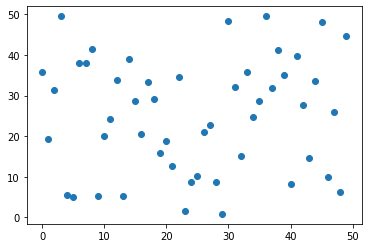

In [5]:
x1 = np.arange(50)
x2 = np.random.rand(x1.size)*50

plt.scatter(x1, x2)

In [36]:
y = np.where(2*x1<1.7*x2 , 0, 1)

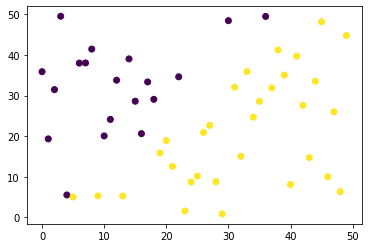

In [37]:
plt.scatter(x1, x2, c = y)

In [38]:
X = np.dstack([x1, x2])[0]
X.shape

(50, 2)

In [39]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X, y)

LogisticRegression()

In [40]:
log.coef_[0][0]

0.9091135423483614

In [41]:
log.intercept_[0]

-0.40196924415242635

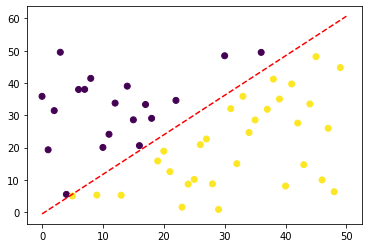

In [43]:
a = np.array([0, 50])
b = -(log.coef_[0][0] * a + log.intercept_[0]) / log.coef_[0][1]

plt.scatter(x1, x2, c = log.predict(X))
plt.plot(a, b, 'r--')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


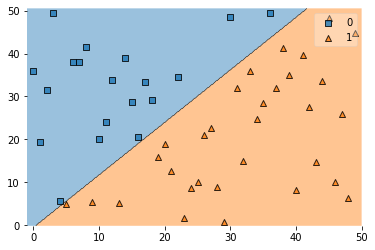

In [44]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf = log)

# Implementation From Scratch

In [98]:
class LogisticRegressionCustom():

    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        
        row, col = X.shape # M = row

        self.W = np.random.rand(col)
        self.b = np.random.rand()

        for i in range(self.iterations):
            distance = X.dot(self.W) + self.b
            y_pred = self.sigmoid(distance)
            y_diff = y_pred - y

            dw = (X.T).dot(y_diff) / row
            db = y_diff.sum() / row

            self.W = self.W - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

            if i<10 or i%100==0:
                a = np.array([0, 50])
                b = -(self.W[0] * a + self.b) / self.W[1]

                plt.scatter(X[:, 0], X[:, 1], c = y)
                plt.plot(a, b, 'r--')
                plt.title(i)
                plt.show()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        distance = X.dot(self.W) + self.b
        y_pred = self.sigmoid(distance)
        return np.round(y_pred)

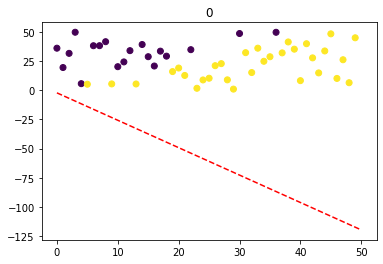

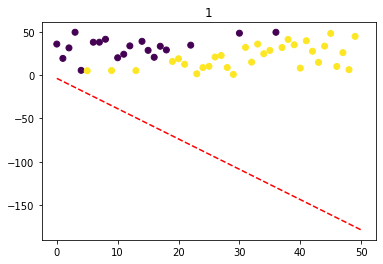

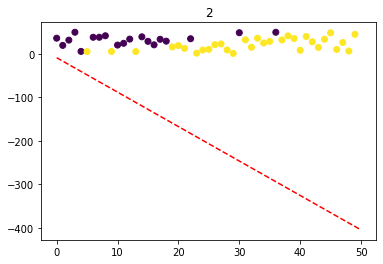

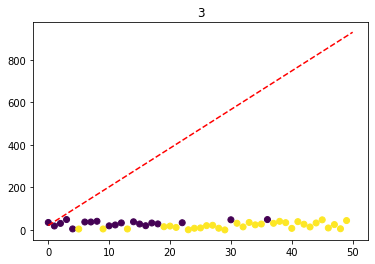

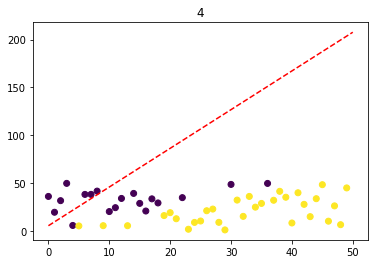

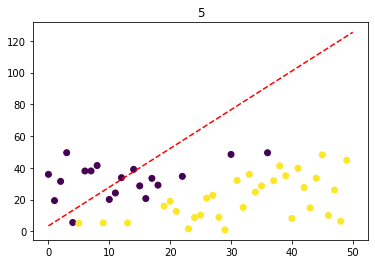

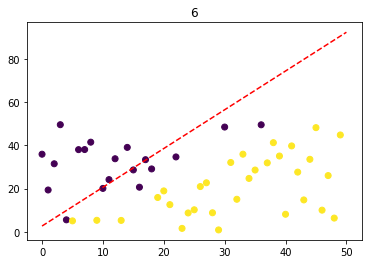

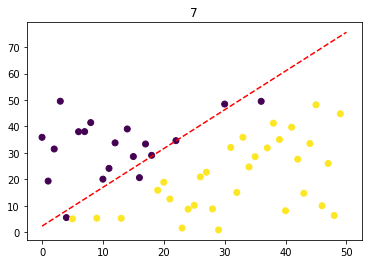

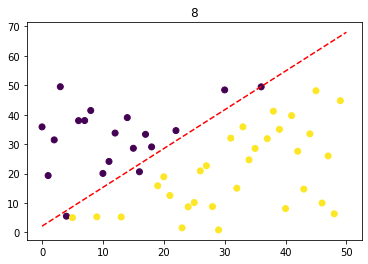

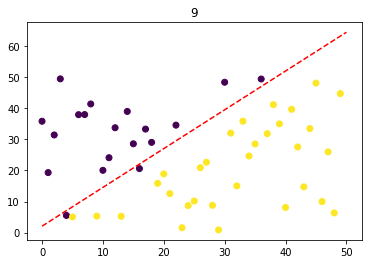

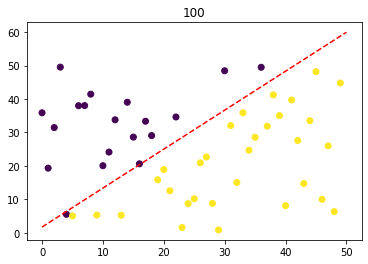

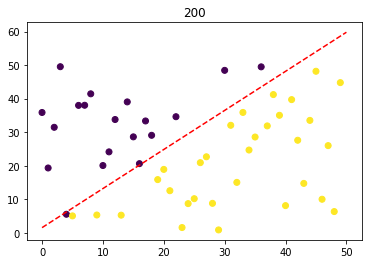

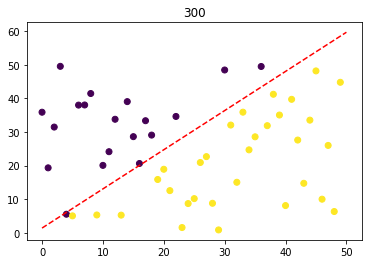

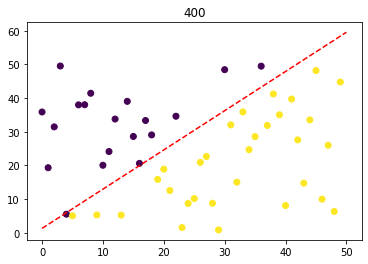

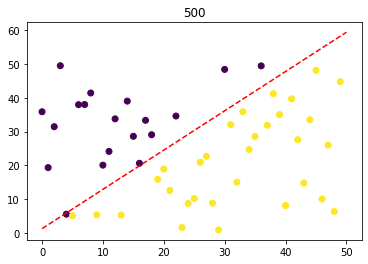

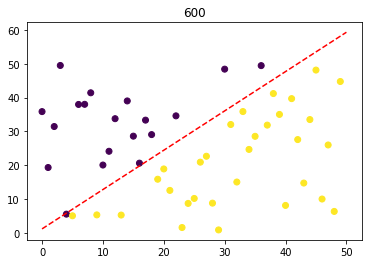

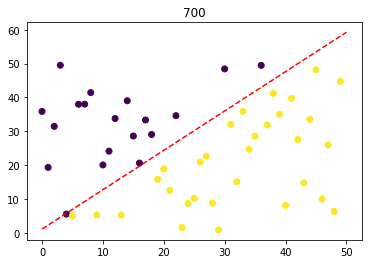

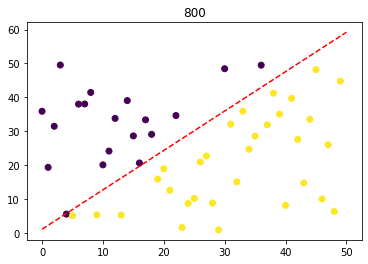

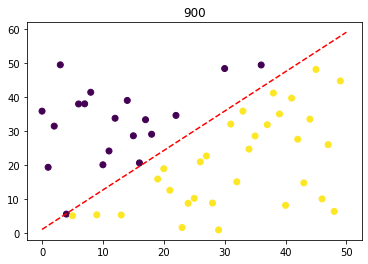

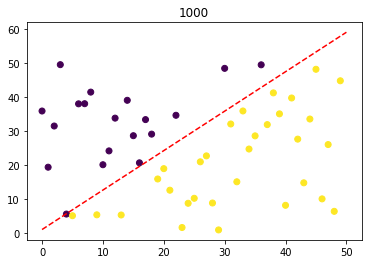

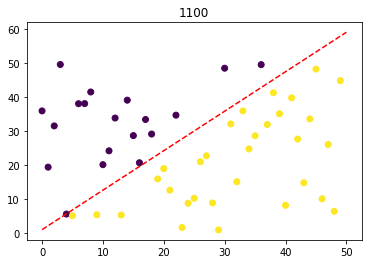

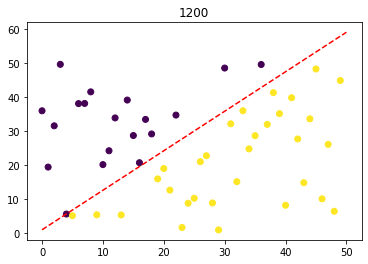

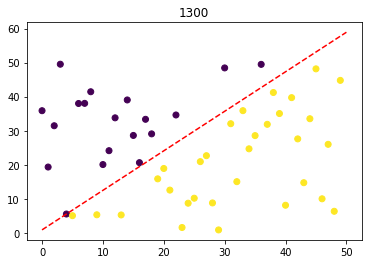

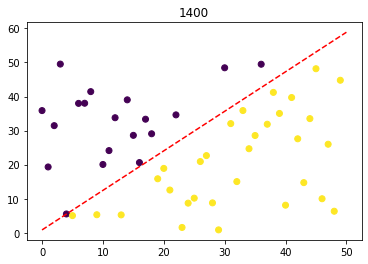

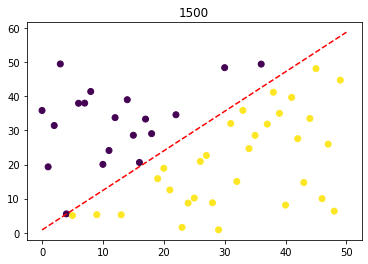

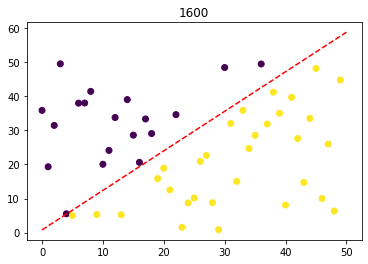

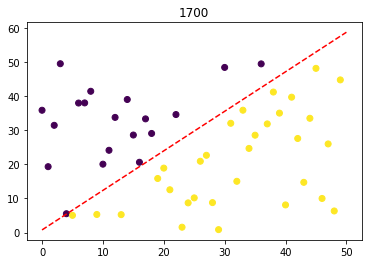

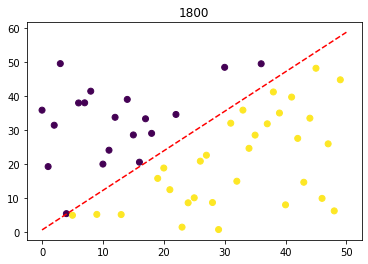

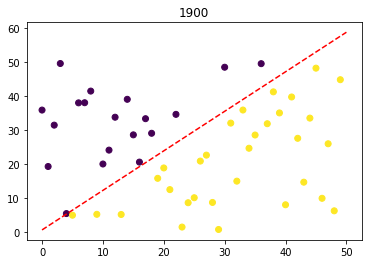

In [100]:
log_custom = LogisticRegressionCustom(0.01, 2000)
log_custom.fit(X, y)

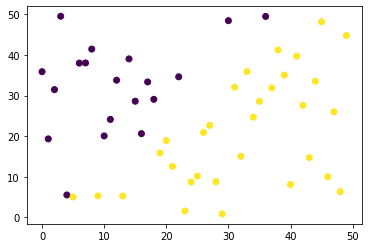

In [101]:
plt.scatter(x1, x2, c = log_custom.predict(X))

# SoftMax

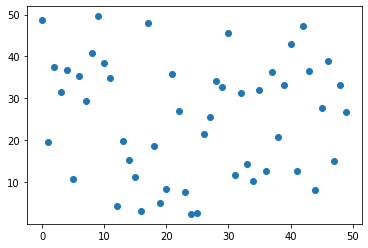

In [106]:
x1 = np.arange(50)
x2 = np.random.rand(x1.size)*50

plt.scatter(x1, x2)
y = (x1*x2)%3

In [110]:
y = y.astype('int8')

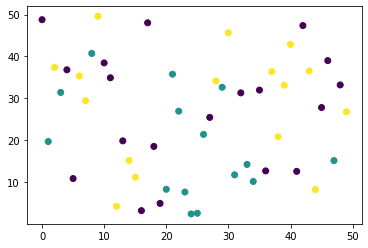

In [111]:
plt.scatter(x1, x2, c = y)

In [112]:
X = np.dstack([x1, x2])[0]

log_multi = LogisticRegression(multi_class = 'multinomial')

log_multi.fit(X, y)

LogisticRegression(multi_class='multinomial')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


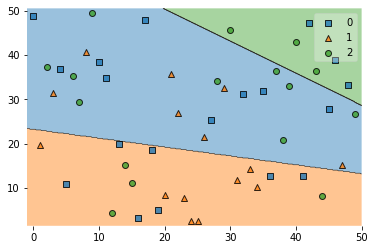

In [114]:
plot_decision_regions(X, y, clf = log_multi)